## <B>Importing Libraries<B>

In [48]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


## <B>Load Data<B>

In [56]:
# Load dataset
df = pd.read_csv("../data/processed/Covid_Processed.csv")
df.describe()


,Unnamed: 0,population,active_cases,critical_cases,total_cases,recovered_cases,1M_pop_cases,1M_pop_deaths,total_deaths,1M_pop_tests,total_tests
count,229.000000,2.290000e+02,2.290000e+02,229.000000,2.290000e+02,2.290000e+02,229.000000,229.000000,2.290000e+02,2.290000e+02,2.290000e+02
mean,115.152838,3.469404e+07,3.360282e+04,55.326923,3.077525e+06,3.097055e+06,202950.253275,1277.348214,3.129762e+04,2.155978e+06,3.298829e+07
std,66.976614,1.386374e+08,1.481979e+05,67.594101,1.006101e+07,9.146811e+06,206154.889634,1295.983422,1.095764e+05,3.517645e+06,1.155952e+08
min,0.000000,7.990000e+02,0.000000e+00,1.000000,1.000000e+01,2.000000e+00,16.000000,2.000000,1.000000e+00,5.093000e+03,7.850000e+03
25%,58.000000,4.454310e+05,7.300000e+01,55.326923,2.733400e+04,4.127800e+04,18885.000000,177.000000,2.280000e+02,2.112440e+05,4.016220e+05
50%,115.000000,5.797805e+06,1.299000e+03,55.326923,2.099060e+05,6.713160e+05,128843.000000,891.000000,2.570000e+03,1.120596e+06,2.769281e+06
75%,173.000000,2.210284e+07,3.360282e+04,55.326923,1.356546e+06,3.097055e+06,333985.000000,2087.000000,1.713200e+04,2.179850e+06,2.475667e+07
max,230.000000,1.448471e+09,1.783377e+06,940.000000,1.118201e+08,1.098144e+08,771655.000000,6595.000000,1.219487e+06,2.330212e+07,1.186852e+09


## <B>Data Predictions<B>

In [50]:
# Choose target column and features
target = "recovered_cases"  # change for regression
# target = "outcome"        # change for classification

features = df.drop(columns=[target]).select_dtypes(include=np.number).columns.tolist()
X = df[features]
y = df[target]

print("Features:", features)
print("Target:", target)


Features: ['Unnamed: 0', 'population', 'active_cases', 'critical_cases', 'total_cases', '1M_pop_cases', '1M_pop_deaths', 'total_deaths', '1M_pop_tests', 'total_tests']
Target: recovered_cases


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (183, 10)
Test shape: (46, 10)


In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression R2: -8.017174518034025
Linear Regression RMSE: 5723961.265603496
Random Forest R2: -9.540596679726308
Random Forest RMSE: 6188623.279679841


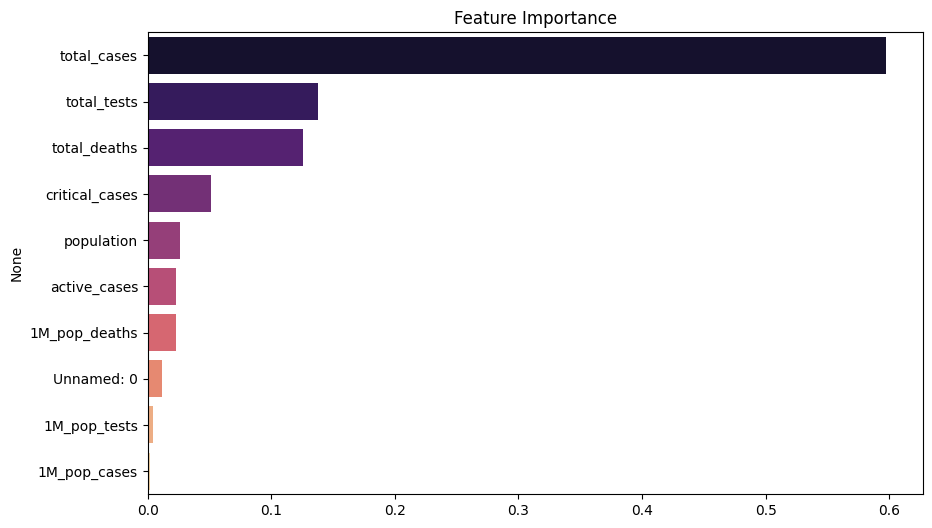

In [54]:
# For tree-based models
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette="magma")
plt.title("Feature Importance")
plt.show()


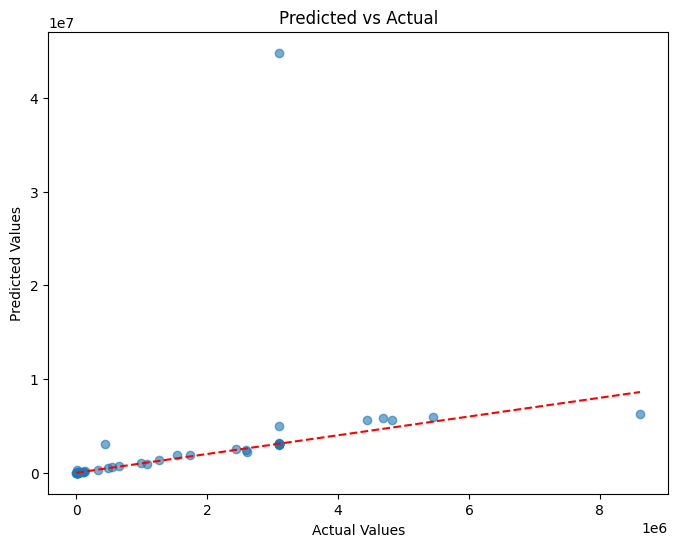

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.show()
